In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [96]:
train = pd.read_csv('train.csv', encoding = 'ISO-8859-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
train.sample(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
28672,49400,Department of Public Works,"Evans, Marilyn","WEATHERS, KRISTINA",7458.0,MONTROSE,NaN,7458.0,MONTROSE,DETROIT,...,0.0,140.0,0.0,140.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
232635,266914,Detroit Police Department,"Zawislak, Norbet","bell, david",16654.0,STOEPEL,NaN,16654.0,stoepel,detroit,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
237136,271640,"Buildings, Safety Engineering & Env Department","ELLARD, EVERETT","INTERSTATE INVESTMENT, ....",9239.0,YORKSHIRE,NaN,341.0,HAMPTON ST,GILBERT,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,IN COLLECTION,NaN,non-compliant by no payment,0.0
194684,226931,Department of Public Works,"Havard, Jacqueline","HOLDINGS LLC, PARAMOUNT",19681.0,ALBION,NaN,1385.0,WESTMOOR DR. #100,WESTMINISTER,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
160955,189889,Department of Public Works,"Bickers-Holmes, Amanda","LLC, GCM CONSTRUCTION",12829.0,CHELSEA,NaN,12829.0,CHELSEA,DETROIT,...,0.0,3880.0,0.0,3880.0,NaN,NO PAYMENT APPLIED,IN COLLECTION,NaN,non-compliant by no payment,0.0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
ticket_id                     250306 non-null int64
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
non_us_str_code               3 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null obj

In [99]:
train.describe()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000000,2.503060e+05,0.0,2.467040e+05,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,1.064986e+04,NaN,9.149788e+03,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,77189.882881,3.188733e+04,NaN,3.602034e+04,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,4.739000e+03,NaN,5.440000e+02,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,1.024400e+04,NaN,2.456000e+03,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,219888.750000,1.576000e+04,NaN,1.292725e+04,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,366178.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [100]:
train.isnull().any()

ticket_id                     False
agency_name                   False
inspector_name                False
violator_name                  True
violation_street_number       False
violation_street_name         False
violation_zip_code             True
mailing_address_str_number     True
mailing_address_str_name       True
city                          False
state                          True
zip_code                       True
non_us_str_code                True
country                       False
ticket_issued_date            False
hearing_date                   True
violation_code                False
violation_description         False
disposition                   False
fine_amount                    True
admin_fee                     False
state_fee                     False
late_fee                      False
discount_amount               False
clean_up_cost                 False
judgment_amount               False
payment_amount                False
balance_due                 

In [101]:
train.dtypes

ticket_id                       int64
agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
violation_zip_code            float64
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
non_us_str_code                object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
payment_amou

In [102]:
#make the ticket id the index
train.index = train['ticket_id']

In [103]:
train.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
27586,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
22062,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22084,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22093,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [104]:
#drop any values in compliance column that is null because null means not responsible
train.compliance = train.compliance.fillna(value=-1)

In [105]:
#Features to keep
#features = ['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'clean_up_cost','judgment_amount']  
features = ['fine_amount', 'late_fee', 'discount_amount','judgment_amount'] 

In [106]:
x = train[features]

In [107]:
train.sample(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
ticket_id,,,,,,,,,,,,,,,,,,,,,
77875,77875,Health Department,"Brooks, Eric","Colwyn, William",15538.0,PLAINVIEW,NaN,3235.0,N. Ravenswood Ave.,Chicago,...,0.0,85.0,85.0,0.0,2007-06-15 00:00:00,PAID IN FULL,NaN,NaN,non-compliant by late payment more than 1 month,0.0
208734,208734,"Buildings, Safety Engineering & Env Department","Samaan, Neil J","BRACY, FREDDIE",484.0,GOLDEN GATE,NaN,484.0,W GOLDEN GATE,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,-1.0
111326,111326,"Buildings, Safety Engineering & Env Department","Morris, John","INC., FIRE RITE",13800.0,LYNDON,NaN,1381.0,LYNDON,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,-1.0
107438,107438,"Buildings, Safety Engineering & Env Department","Devaney, John","CORPORATION, PERFIT",6500.0,RUSSELL,NaN,7285.0,DIVISION,GRAND RAPIDS,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
33444,33444,"Buildings, Safety Engineering & Env Department","Williams, Darrin","SALDANA, RAMON",4818.0,LAKEWOOD,NaN,5487.0,ORTMAN DRIVE,STERLING HGTS,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,-1.0


In [108]:
y = train[train.compliance != -1]

In [109]:
y_value = y.compliance

In [110]:
y_value.head()

ticket_id
22056    0.0
27586    1.0
22046    0.0
18738    0.0
18735    0.0
Name: compliance, dtype: float64

In [111]:
x.fillna(value = -1)

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount
ticket_id,,,,,,,
22056,250.0,20.0,10.0,25.0,0.0,0.0,305.0
27586,750.0,20.0,10.0,75.0,0.0,0.0,855.0
22062,250.0,0.0,0.0,0.0,0.0,0.0,0.0
22084,250.0,0.0,0.0,0.0,0.0,0.0,0.0
22093,250.0,0.0,0.0,0.0,0.0,0.0,0.0
22046,250.0,20.0,10.0,25.0,0.0,0.0,305.0
18738,750.0,20.0,10.0,75.0,0.0,0.0,855.0
18735,100.0,20.0,10.0,10.0,0.0,0.0,140.0
18733,100.0,20.0,10.0,10.0,0.0,0.0,140.0


In [112]:
x = y[features]

In [113]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y_value, random_state = 0)

In [114]:
#Compiling the model (Random Forest)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10, max_depth = 5).fit(X_train, y_train)

In [115]:
#Importing test data
test_data = pd.read_csv('readonly/test.csv')

In [116]:
test_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [117]:
test_data.index = test_data['ticket_id']

In [118]:
test_data.sample(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
ticket_id,,,,,,,,,,,,,,,,,,,,,
304727,304727,Department of Public Works,"Frazier, Willie","INCOMEPLUS II, LLC, T.D.",19380.0,WHITCOMB,NaN,933,FRESNO PLACE,COQUITLAM,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,500.0,20.0,10.0,50.0,0.0,0.0,580.0,NaN
325256,325256,Department of Public Works,"Zizi, Josue","KAISER LIVING TRUST, MARJORIE B",9651.0,BEAVERLAND,48239,12575,TELEGRAPH,TAYLOR,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Admission,500.0,20.0,10.0,0.0,0.0,0.0,530.0,NaN
368376,368376,Detroit Police Department,"Nichols, Douglas","CURRY, JULIA/ LEON",8140.0,SUZANNE,48234,814,SUZANNE ST,DET,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,500.0,20.0,10.0,50.0,0.0,0.0,580.0,NaN
294875,294875,Department of Public Works,"Zizi, Josue","WALTERINE, CHANCELLOR",13441.0,PURITAN,NaN,13441,PURITAN,DETROIT,...,Excessive weeds or plant growth one- or two-fa...,Responsible by Default,50.0,20.0,10.0,5.0,0.0,0.0,85.0,NaN
343110,343110,"Buildings, Safety Engineering & Env Department","Bush, Wesley","GRIFFIN, ROBERT",10340.0,FENKELL,NaN,1234,NORTHLAWN,DETROIT,...,Failure of owner to remove graffiti or maintai...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,1782.0,1921.9,GRAFFITI TICKET


In [119]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Training score: ' + str(train_score) + '       Testing score: ' + str(test_score))

Training score: 0.93562672004       Testing score: 0.934575931949


In [120]:
prediction = model.predict_proba(test_data[features])

In [121]:
prediction

array([[ 0.9348413 ,  0.0651587 ],
       [ 0.97244668,  0.02755332],
       [ 0.92797321,  0.07202679],
       ..., 
       [ 0.92797321,  0.07202679],
       [ 0.92797321,  0.07202679],
       [ 0.74007185,  0.25992815]])

In [122]:
compliance_prob = pd.Series(data = prediction[:,1], index = test_data['ticket_id'], dtype = 'float32')

In [123]:
compliance_prob

ticket_id
284932    0.065159
285362    0.027553
285361    0.072027
285338    0.065159
285346    0.072027
285345    0.065159
285347    0.059013
285342    0.292863
285530    0.027553
284989    0.028757
285344    0.059013
285343    0.027553
285340    0.027553
285341    0.059013
285349    0.072027
285348    0.065159
284991    0.028757
285532    0.028757
285406    0.028757
285001    0.028757
285006    0.027553
285405    0.027553
285337    0.028757
285496    0.059013
285497    0.065159
285378    0.027553
285589    0.028757
285585    0.065159
285501    0.072027
285581    0.027553
            ...   
376367    0.028757
376366    0.036343
376362    0.036343
376363    0.065159
376365    0.028757
376364    0.036343
376228    0.036343
376265    0.036343
376286    0.315943
376320    0.036343
376314    0.036343
376327    0.315943
376385    0.315943
376435    0.360766
376370    0.315943
376434    0.059013
376459    0.072027
376478    0.007172
376473    0.036343
376484    0.027719
376482    0.028757
37

Feature ranking:
1. feature 3 (0.492955)
2. feature 4 (0.348939)
3. feature 6 (0.125551)
4. feature 0 (0.032555)
5. feature 5 (0.000000)
6. feature 2 (0.000000)
7. feature 1 (0.000000)


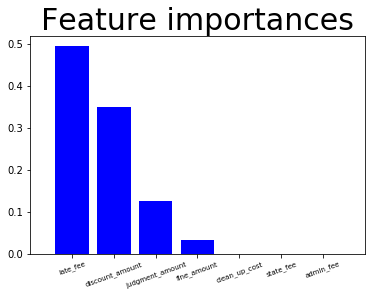

In [126]:
#feature importance

#label for x-axis
feature_name = np.array(X_train.columns.values)
feature_name

importance = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances",size=30)
plt.bar(range(X_train.shape[1]), importance[indices],
      yerr=std[indices], color='b' , align="center")
plt.xticks(range(X_train.shape[1]), feature_name[indices],rotation=20,fontsize = 7)
plt.xlim([-1, X_train.shape[1]])
plt.show()